In [2]:
"""Create parameters.py and load it"""

# Directory for .inp file:
path = 'D:/parameter_studies/Bubble_dynamics_simulation/INP file examples/chem_Otomo2018_without_O.inp'

# import libraries:
import importlib   # For reloading your own files
from termcolor import colored   # for colored error messages
# my own files:
try:
    import inp_data_extractor as inp
except:
    try:
        import Bubble_dynamics_simulation.inp_data_extractor as inp
    except:
        print(colored(f'Error, \'inp_data_extractor.py\' not found', 'red'))
importlib.reload(inp)   # reload changes you made
inp.extract(path)

import parameters as par   # numeric constants and coefficents
importlib.reload(par)   # reload changes you made
print(par.model)

path=D:/parameter_studies/Bubble_dynamics_simulation/INP file examples/chem_Otomo2018_without_O.inp
Note, lambda value for specie 'H' is not in data.py: 0.0 is used
Note, lambda value for specie 'NH2' is not in data.py: 0.0 is used
Note, lambda value for specie 'NH' is not in data.py: 0.0 is used
Note, lambda value for specie 'N' is not in data.py: 0.0 is used
Note, lambda value for specie 'NNH' is not in data.py: 0.0 is used
Note, lambda value for specie 'N2H4' is not in data.py: 0.0 is used
Note, lambda value for specie 'N2H3' is not in data.py: 0.0 is used
Note, lambda value for specie 'N2H2' is not in data.py: 0.0 is used
Note, lambda value for specie 'H2NN' is not in data.py: 0.0 is used
Warning, third body 'H2O' is not in species in line 64 (' H2/2.5/ H2O/12/ AR/0.0/ ') in reaction 'H2+M=H+H+M'
Warning, third body 'AR' is not in species in line 64 (' H2/2.5/ H2O/12/ AR/0.0/ ') in reaction 'H2+M=H+H+M'
model: chem_Otomo2018_without_O
File 'parameters.py' succesfully created
chem_O

In [3]:
"""Libraries"""

# for plotting:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

import numpy as np   # matrices, math
import os    # file management
import pandas as pd   # data frames
import importlib   # for reloading your own files
from termcolor import colored   # for colored error messages

# my own file:
already_imported = 'de' in globals()
try:
    import full_bubble_model as de
except:
    try:
        import Bubble_dynamics_simulation.full_bubble_model as de
    except:
        print(colored(f'Error, \'full_bubble_model.py\' not found', 'red'))
if already_imported: importlib.reload(de)   # reload changes you made

model: chem_Otomo2018_without_O
target specie: NH3
excitation: no_excitation (control parameters: [])
enable heat transfer: True	enable evaporation: False	enable reactions: True	enable dissipated energy: False


In [4]:
"""Base settings"""

# r-string will not convert \n to new line
directory = r'D:/parameter_studies/gradient_descent_test_1'
file_base_name = 'output_'

In [5]:
"""Load all CSV files from directory into a dataframe (all_data)"""

# create a dataframe
all_data = pd.DataFrame()
num = 0
print(f'Found files:')

# iterate trough all files in directory (including subdirectories)
for (root, dirs, files) in os.walk(directory):
    for file in files:
        # ignore python rubish
        if 'ipynb_checkpoints' in root:
            continue
        # check if it's a CSV starting with file_base_name
        if file[-4:] != '.csv':
            continue
        if file[:len(file_base_name)] != file_base_name:
            continue

        # read file
        num += 1
        current_data = pd.read_csv(os.path.join(root, file))

        # Cast object-dtype columns with all-bool values to bool dtype
        for col in current_data.columns:
            if current_data[col].dtype == 'object' and all(current_data[col].dropna().map(lambda x: isinstance(x, bool))):
                current_data[col] = current_data[col].astype(bool)

        print(f'\t{file: <24} ({current_data.shape[0]: >4} rows)')
        all_data = pd.concat([all_data, current_data])
    
    
# Print some stats:
print(f'_______________________________________')
print(f'total number of files: {num}')
total = all_data.shape[0]
print(f'{"total:": <10} {total: < 8} rows   ( 100.00 %)')

# Print errors
def matches(error, error_code):
    errors, success = de.get_errors(error_code)
    return error in errors

for error in de.error_codes.keys():
    digit = -1; place = -1
    for i in range(10):
        if str(i) in error:
            digit = i
            place = len(error) - error.find(str(i)) - 1

    if digit < 0 and place < 0:
        print(colored(f'Error: invalid error code: {error}', 'red'))
        continue
    num = all_data.loc[(all_data['error_code'] // (10**place) % 10) == digit].shape[0]
    if error == 'x0x':
        num  -= all_data.loc[(all_data['error_code'] % 10) == 0].shape[0] # xx0
    print(f'{error + ":": <10} {num: < 8} rows   ({(100*num/total): 7.2f} %)\t' + colored(de.error_codes[error]['describtion'], de.error_codes[error]['color']))



#for error_code in range(7):
#    num = all_data.loc[(all_data['error_code'] == error_code)].shape[0]
#    print(f'error code {error_code}: {num} rows   ({(100*num/total):.2f} %)')
#num = all_data.loc[(all_data['T_max'] > 6000.0)].shape[0]
#print(f'too hot: {num} rows    ({100*num/total:.2f} %)')
print(f'_______________________________________')

Found files:
	output_1.csv             (1000 rows)
	output_10.csv            ( 145 rows)
	output_11.csv            ( 147 rows)
	output_2.csv             (  60 rows)
	output_3.csv             ( 120 rows)
	output_4.csv             ( 169 rows)
	output_5.csv             ( 137 rows)
	output_6.csv             ( 140 rows)
	output_7.csv             (  76 rows)
	output_8.csv             ( 140 rows)
	output_9.csv             (  93 rows)
_______________________________________
total number of files: 11
total:      2227    rows   ( 100.00 %)
xx0:        2217    rows   (  99.55 %)	succecfully solved with LSODA solver
xx1:        6       rows   (   0.27 %)	LSODA solver didn't converge
xx2:        4       rows   (   0.18 %)	LSODA solver timed out
xx3:        0       rows   (   0.00 %)	LSODA solver had a fatal error
x0x:        1       rows   (   0.04 %)	succecfully solved with Radau solver
x4x:        9       rows   (   0.40 %)	Radau solver didn't converge (NO SOLUTION!)
x5x:        0       rows   ( 

In [6]:
"""Locate valid (good_data) and wrong (wrong_data) simulations"""

# Get valid datas (or use all_data['success'] == True)
good_data = all_data.loc[
    (all_data['error_code'] % 100 <= 3) & ((all_data['error_code'] // 100) % 10 != 1) &
    (all_data['energy_efficiency'] > 0.0) & (all_data['energy_efficiency'] == all_data['energy_efficiency']) # positive not NaN
    # or set negative energy to inf: good_data.loc[good_data['energy'] < 0.0, 'energy'] = 1e10
]

# Everything that's not in good_data
wrong_data = pd.concat([good_data, all_data]).drop_duplicates(keep=False)

# Sort by energy
good_data = good_data.sort_values(['energy_efficiency'], ascending=True)

# New column
good_data['logE'] = np.log10(good_data['energy_efficiency'])
print(f'Good data: {good_data.shape[0]} rows ({100*good_data.shape[0]/all_data.shape[0]: .2f} %)')

Good data: 2218 rows ( 99.60 %)


In [7]:
"""Let's see the dataframe"""

good_data[['ID', 'R_E', 'ratio', 'P_amb', 'alfa_M', 'T_inf', 'P_v', 'mu_L', 'elapsed_time', 'steps', f'n_{de.target_specie}', 'energy_efficiency'] + de.excitation_args]

,ID,R_E,ratio,P_amb,alfa_M,T_inf,P_v,mu_L,elapsed_time,steps,n_NH3,energy_efficiency
52,134,0.000039,6.244449,101325.0,0.35,303.15,2338.1,0.001,2.266763,14619,1.602463e-13,2.130798e+03
51,134,0.000039,6.244449,101325.0,0.35,303.15,2338.1,0.001,2.240360,14619,1.602463e-13,2.130798e+03
53,134,0.000039,6.244449,101325.0,0.35,303.15,2338.1,0.001,2.143724,14660,1.602488e-13,2.130798e+03
54,134,0.000039,6.244458,101325.0,0.35,303.15,2338.1,0.001,2.183025,14637,1.602470e-13,2.130798e+03
58,134,0.000039,6.242956,101325.0,0.35,303.15,2338.1,0.001,2.511405,14600,1.598780e-13,2.130804e+03
...,...,...,...,...,...,...,...,...,...,...,...,...
439,445,0.000049,2.347935,101325.0,0.35,303.15,2338.1,0.001,0.955938,7297,5.643248e-42,4.829917e+30
783,789,0.000091,2.149906,101325.0,0.35,303.15,2338.1,0.001,0.896478,6761,1.787905e-41,7.007779e+30
497,505,0.000042,2.363199,101325.0,0.35,303.15,2338.1,0.001,1.054418,7645,1.670104e-42,1.100276e+31
118,122,0.000097,2.088940,101325.0,0.35,303.15,2338.1,0.001,0.818336,6507,8.502059e-43,1.614282e+32


In [10]:
"""Print some statistics"""

good_data[['ID', 'R_E', 'ratio', 'P_amb', 'alfa_M', 'T_inf', 'P_v', 'mu_L', 'elapsed_time', 'steps', f'n_{de.target_specie}', 'energy_efficiency'] + de.excitation_args].describe()

,ID,R_E,ratio,P_amb,alfa_M,T_inf,P_v,mu_L,elapsed_time,steps,n_NH3,energy_efficiency
count,2218.000000,2218.000000,2218.000000,2218.0,2.218000e+03,2.218000e+03,2218.0,2218.000,2218.000000,2218.000000,2.218000e+03,2.218000e+03
mean,432.866997,0.000067,5.921734,101325.0,3.500000e-01,3.031500e+02,2338.1,0.001,2.299739,14959.572137,5.136160e-13,1.532841e+30
std,307.637544,0.000045,1.479845,0.0,1.110473e-16,1.137125e-13,0.0,0.000,0.931287,2291.924106,9.140822e-13,6.659497e+31
min,0.000000,0.000019,1.905992,101325.0,3.500000e-01,3.031500e+02,2338.1,0.001,0.637988,5623.000000,-3.976992e-26,2.130798e+03
25%,179.000000,0.000034,5.661114,101325.0,3.500000e-01,3.031500e+02,2338.1,0.001,2.059680,14503.000000,7.851418e-14,2.139401e+03
50%,392.500000,0.000044,6.261543,101325.0,3.500000e-01,3.031500e+02,2338.1,0.001,2.240921,14782.500000,1.528304e-13,2.183231e+03
75%,704.750000,0.000096,6.599487,101325.0,3.500000e-01,3.031500e+02,2338.1,0.001,2.599124,15472.750000,2.939231e-13,1.016120e+04
max,999.000000,0.000180,9.092133,101325.0,3.500000e-01,3.031500e+02,2338.1,0.001,36.600026,38467.000000,4.993136e-12,3.132255e+33


succecfully solved with LSODA solver
Low pressure warning: The pressure during the expansion is lower, than the saturated water pressure


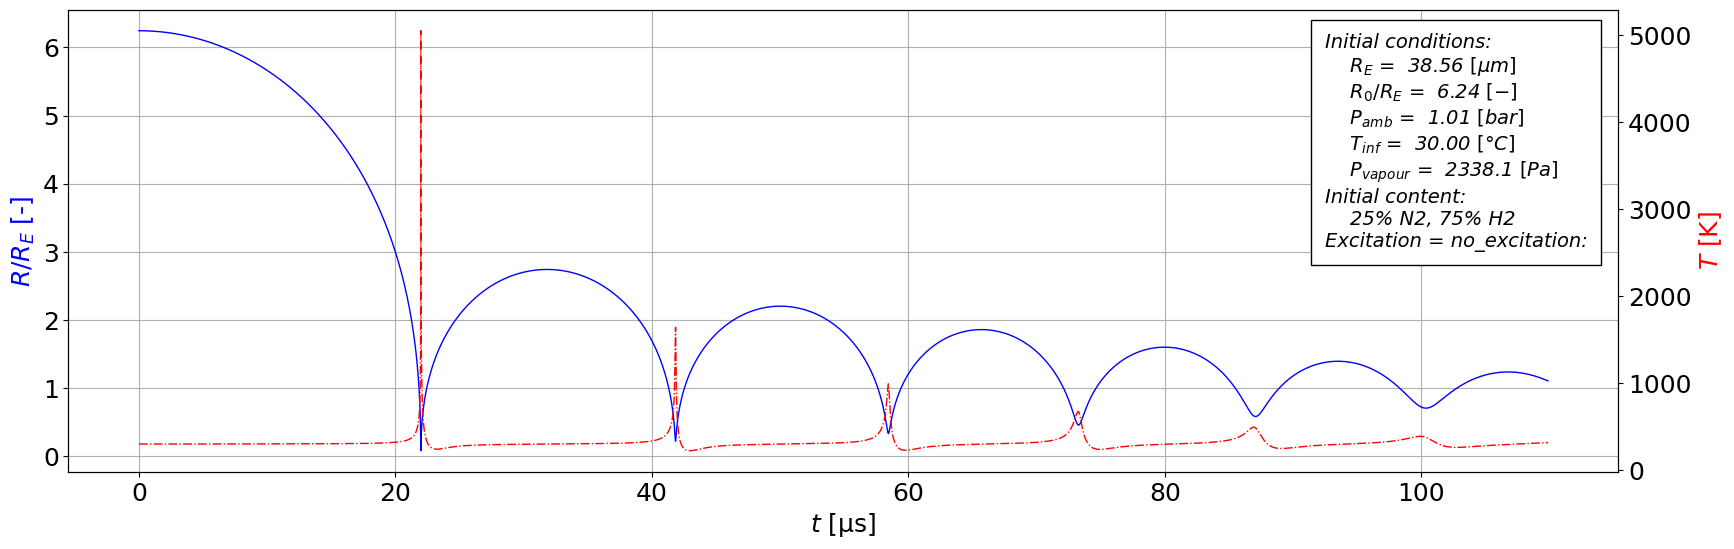

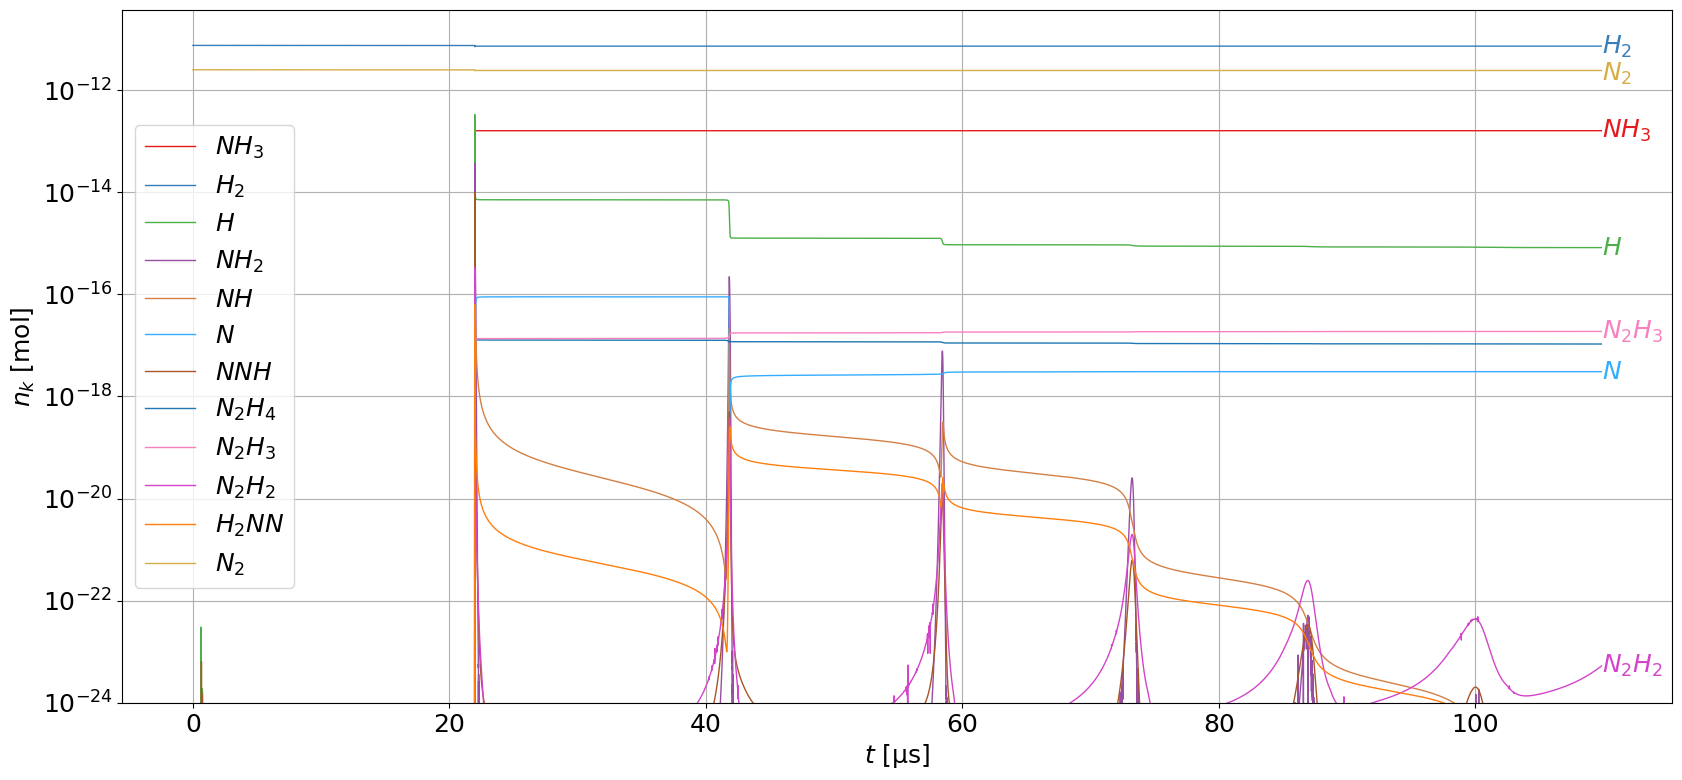

Control parameters:
    ID = 134,                                    # ID of control parameter (not used during calculation)
  # Initial conditions:
    R_E =  0.00003856,                           # bubble equilibrium radius [m]
    ratio =  6.24,                               # initial radius / equilibrium radius R_0/R_E [-]
    gases = [par.index['N2'], par.index['H2']],  # indexes of species in initial bubble (list of species indexes)
    fractions = [0.25, 0.75],                    # molar fractions of species in initial bubble (list of fractions for every gas)
  # Ambient parameters:
    P_amb =  101325.00,                          # ambient pressure [Pa]
    T_inf =  303.15,                             # ambient temperature [K]
  # Liquid parameters:
    alfa_M =  0.3500,                            # water accommodation coefficient [-]
    P_v =  2338.10,                              # vapour pressure [Pa]
    mu_L =  0.0010,                              # dynamic viscosity [Pa*

In [12]:
"""Plot a certain simulation"""

# converts a line of all_data to a dictionary containing the control parameters (cpar)
def line_to_dict(line):
    # check 'full_bubble_model.py' settings
    if (de.enable_heat_transfer != line['enable_heat_transfer'] or
        de.enable_evaporation != line['enable_evaporation'] or
        de.enable_reactions != line['enable_reactions'] or
        de.enable_dissipated_energy != line['enable_dissipated_energy'] or
        de.target_specie != line['target_specie'] or
        de.excitation_type != line['excitation_type']):
        print(colored(f'Error: the settings of \'full_bubble_model.py\' do not match the current settings', 'red'))

    gases = str(line['gases'])
    gases = [int(index) for index in gases.split(' ') if index != '']
    fractions = str(line['fractions'])
    fractions = [float(frac) for frac in fractions.split(' ') if frac != '']

    cpar = de.dotdict(dict(
        ID = line['ID'],                  # ID of control parameter (not used during calculation)
    # Initial conditions:
        R_E = line['R_E'],                # bubble equilibrium radius [m]
        ratio = line['ratio'],            # initial radius / equilibrium radius R_0/R_E [-]
        gases = gases,                    # indexes of species in initial bubble (list of species indexes)
        fractions = fractions,            # molar fractions of species in initial bubble (list of fractions for every gas)
    # Ambient parameters:
        P_amb = line['P_amb'],            # ambient pressure [Pa]
        T_inf = line['T_inf'],            # ambient temperature [K]
    # Liquid parameters:
        alfa_M = line['alfa_M'],          # water accommodation coefficient [-]
        P_v = line['P_v'],                # vapour pressure [Pa]
        mu_L = line['mu_L'],              # dynamic viscosity [Pa*s]
        c_L = line['c_L'],                # sound speed [m/s]
        surfactant = line['surfactant'],  # surfactant (surface tension modfier) [-]
    ))

    # Excitation parameters:
    for arg in de.excitation_args:
        cpar[arg] = line[arg]

    return cpar

cpar = line_to_dict(good_data.iloc[0])   # choose the most energy efficient one
de.plot(cpar, plot_pressure=False, show_legend=True)